In [3]:
!pip install numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 33.1 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 27.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 37.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]


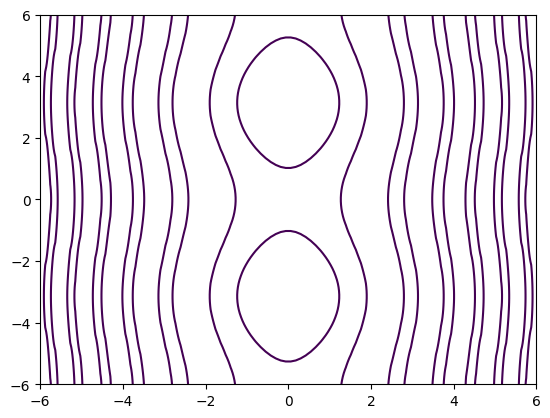

In [5]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x, y: np.sin(x**2 + np.cos(y))
xx, yy = np.meshgrid(np.linspace(-6, 6, 100), np.linspace(-6, 6, 100))
zz = f(xx, yy)
plt.contour(xx, yy, zz, levels=[.5])


In [41]:
def contour(f, xmin, xmax, ymin, ymax, n, level) -> np.array:
    x = np.linspace(xmin, xmax, n+1)
    y = np.linspace(ymin, ymax, n+1)
    xx, yy = np.meshgrid(x, y)
    zz = f(xx, yy)
    xy = np.empty((0, 4))
    for i in range(n):
        for j in range(n):
            pts = np.empty((0, 2))
            if (zz[i, j]-level)*(zz[i+1, j]-level) < 0:
                t = (level - zz[i, j])/(zz[i+1, j]-zz[i, j])
                px = xx[i, j] + t*(xx[i+1, j]-xx[i, j])
                py = yy[i, j] + t*(yy[i+1, j]-yy[i, j])
                pts = np.vstack((pts, np.array([px, py])))
            if (zz[i, j]-level)*(zz[i, j+1]-level) < 0:
                t = (level - zz[i, j])/(zz[i, j+1]-zz[i, j])
                px = xx[i, j] + t*(xx[i, j+1]-xx[i, j])
                py = yy[i, j] + t*(yy[i, j+1]-yy[i, j])
                pts = np.vstack((pts, np.array([px, py])))
            if (zz[i+1, j]-level)*(zz[i+1, j+1]-level) < 0:
                t = (level - zz[i+1, j])/(zz[i+1, j+1]-zz[i+1, j])
                px = xx[i+1, j] + t*(xx[i+1, j+1]-xx[i+1, j])
                py = yy[i+1, j] + t*(yy[i+1, j+1]-yy[i+1, j])
                pts = np.vstack((pts, np.array([px, py])))
            if (zz[i, j+1]-level)*(zz[i+1, j+1]-level) < 0:
                t = (level - zz[i, j+1])/(zz[i+1, j+1]-zz[i, j+1])
                px = xx[i, j+1] + t*(xx[i+1, j+1]-xx[i, j+1])
                py = yy[i, j+1] + t*(yy[i+1, j+1]-yy[i, j+1])
                pts = np.vstack((pts, np.array([px, py])))
            if pts.shape[0] > 1:
                for k in range(pts.shape[0]-1):
                    xy = np.vstack((xy, np.array([pts[k, 0], pts[k, 1], pts[k+1, 0], pts[k+1, 1]])))
    return xy


In [ ]:
       1
  A o--x--o B
    |     |
  2 |     | 4
    x     |
    |     |
  C o-----o D
       3

(2628, 4)


(-6.0, 6.0)

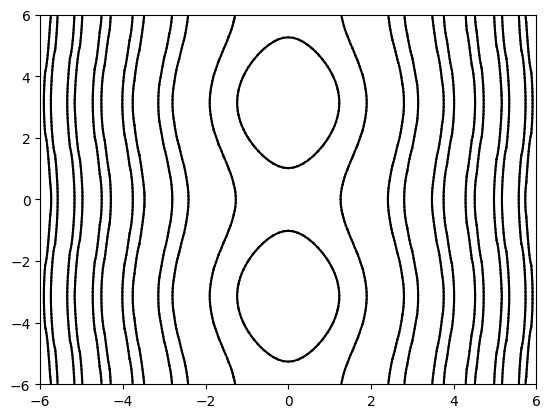

In [44]:
f = lambda x, y: np.sin(x**2 + np.cos(y))
xy = contour(f, -6, 6, -6, 6, 100, .5)
print(xy.shape)
for i in range(xy.shape[0]):
    plt.plot([xy[i, 0], xy[i, 2]], [xy[i, 1], xy[i, 3]], 'k')
plt.xlim([-6, 6])
plt.ylim([-6, 6])

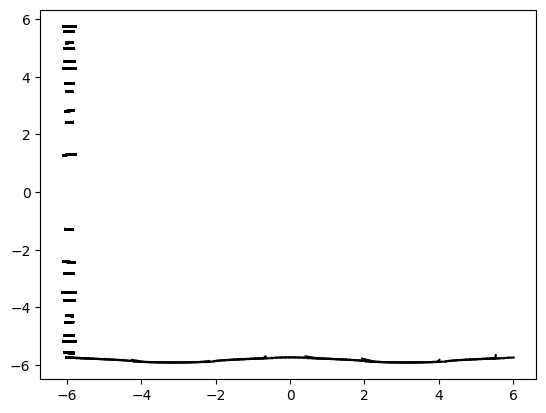